<a href="https://colab.research.google.com/github/lmkwytnicholas/nic.github.io/blob/master/housingDataPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
1. Predicted housing prices
2. Identified the important features using PCA and compared extraction performance in LR modeling against original dataset

PCA R2 Score: 77.41%
Original R2 Score: 81.19%

#Data Access & EDA

In [ ]:
# Load libraries
import numpy as np
import pandas as pd

# Configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tech I.S./Datasets/train.csv')

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# More efficient way to do this?
dnum1=[col for col in data.columns if data[col].dtype=='float64']
dnum1
dnum2=[col for col in data.columns if data[col].dtype=='int64']
dnum2

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
dnumcol = dnum1+dnum2
dnumcol.pop()

'SalePrice'

In [ ]:
dn = data[dnumcol]
# dn.head()
y = data['SalePrice']

In [ ]:
dn.isnull().sum()

LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
for col in dn:
  dn[col] = dn[col].fillna(dn[col].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dn.isnull().sum()

LotFrontage      0
MasVnrArea       0
GarageYrBlt      0
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
dn.head()

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,196.0,2003.0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,0.0,1976.0,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,162.0,2001.0,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,0.0,1998.0,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,350.0,2000.0,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


In [ ]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   MasVnrArea     1460 non-null   float64
 2   GarageYrBlt    1460 non-null   float64
 3   Id             1460 non-null   int64  
 4   MSSubClass     1460 non-null   int64  
 5   LotArea        1460 non-null   int64  
 6   OverallQual    1460 non-null   int64  
 7   OverallCond    1460 non-null   int64  
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  TotalBsmtSF    1460 non-null   int64  
 14  1stFlrSF       1460 non-null   int64  
 15  2ndFlrSF       1460 non-null   int64  
 16  LowQualFinSF   1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

In [ ]:
# dn = dn.drop('SalePrice',axis=1)
dn.head()

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,196.0,2003.0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,0.0,1976.0,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,162.0,2001.0,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,0.0,1998.0,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,350.0,2000.0,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(dn)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
dns = pd.DataFrame(mms.transform(dn))
dns.columns = dnumcol
dns.head()

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.150685,0.12250,0.936364,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.202055,0.00000,0.690909,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.160959,0.10125,0.918182,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.133562,0.00000,0.890909,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.215753,0.21875,0.909091,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dns)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Principal axes in feature space - Direction and Magnitude
print(pca.components_)

[[ 3.31431373e-02  9.08846336e-02  3.43708470e-01 ... -1.76370307e-03
   2.66788905e-02 -1.07276871e-02]
 [-2.20632026e-03 -1.71330361e-02  6.43693903e-02 ...  1.61472627e-05
  -2.08012987e-01  9.02396668e-01]
 [-1.07446642e-02  3.18487512e-02 -1.49282402e-01 ...  2.24368836e-03
  -7.61108157e-02  3.39051069e-01]
 ...
 [ 1.89779401e-02  6.14382823e-03  1.96968053e-03 ...  9.78226872e-01
  -4.52337460e-04 -1.58551677e-04]
 [ 2.46213020e-16 -4.43117696e-17  1.67212824e-16 ... -3.18887793e-16
   2.60223858e-17  3.21137853e-17]
 [-0.00000000e+00  2.07511554e-16  2.15700669e-16 ... -2.35340476e-16
  -2.88122437e-17  1.42728598e-18]]


In [ ]:
pca.components_.shape

(37, 37)

In [ ]:
type(pca.components_)

numpy.ndarray

In [ ]:
pca.explained_variance_

array([2.39667452e-01, 1.15812541e-01, 1.01760374e-01, 8.37094383e-02,
       7.52537667e-02, 5.89910614e-02, 5.64373202e-02, 5.00527640e-02,
       4.47293922e-02, 3.05841974e-02, 2.46591346e-02, 1.99505935e-02,
       1.91474469e-02, 1.53242846e-02, 1.36217166e-02, 1.26020831e-02,
       1.25870065e-02, 1.14709056e-02, 1.08667137e-02, 1.04089260e-02,
       8.87148682e-03, 8.68156967e-03, 7.29855820e-03, 6.44444900e-03,
       5.59136474e-03, 4.70858465e-03, 3.56157880e-03, 3.39797547e-03,
       3.22571682e-03, 2.58814422e-03, 2.55143330e-03, 2.23837230e-03,
       1.67053352e-03, 1.32652061e-03, 9.85960344e-04, 4.72660707e-32,
       1.05803603e-33])

In [ ]:
pca.mean_

array([0.16734143, 0.0644482 , 0.71444583, 0.5       , 0.21704271,
       0.04308036, 0.56659056, 0.57191781, 0.71933194, 0.58109589,
       0.07860378, 0.03158027, 0.24282552, 0.17306538, 0.19013922,
       0.16803509, 0.01021769, 0.22258171, 0.14178082, 0.02876712,
       0.5216895 , 0.19143836, 0.35830479, 0.34885845, 0.37648402,
       0.2043379 , 0.44178082, 0.3335544 , 0.10997027, 0.08530215,
       0.03977194, 0.00671179, 0.031377  , 0.00373835, 0.00280574,
       0.48381071, 0.45393836])

In [ ]:
pca.noise_variance_

0.0

In [ ]:
pc = pca.fit_transform(dns)
print(pc)

pcdf = pd.DataFrame(pc)
type(pcdf)

[[ 4.97181339e-01  1.32074393e-01  1.70129124e-01 ... -6.16688067e-03
  -1.06622624e-15  4.00719730e-16]
 [-1.16628405e-01 -1.01240536e-01 -2.99090666e-01 ... -9.63451892e-03
   1.79916687e-15  2.32619035e-16]
 [ 5.40235468e-01 -2.28808316e-02  1.34898682e-01 ...  2.58362105e-03
  -4.74970704e-16  2.30139888e-16]
 ...
 [ 9.06185668e-02  3.92919438e-01  5.39142909e-01 ...  1.44695387e-01
  -1.00318765e-16 -4.57951615e-18]
 [-3.74661660e-01  7.10599764e-01 -7.58449887e-02 ... -4.99021636e-03
   7.81810562e-17  6.44492275e-18]
 [-3.65001394e-01  5.42365524e-02  9.76331587e-02 ... -2.93132766e-03
  -9.23605645e-17  4.76437970e-18]]


pandas.core.frame.DataFrame

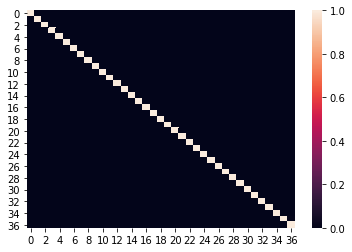

In [ ]:
import seaborn as sns

sns.heatmap(pcdf.corr())

In [ ]:
# Number of Principal Components

Text(0, 0.5, 'Cumulative Explained Variance')

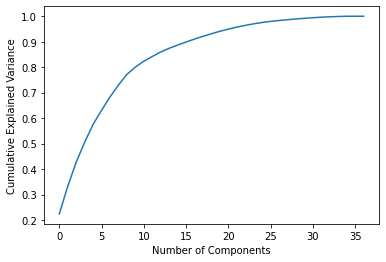

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# If aim is to account for 90% of the variance, then why do we run the int 3 in the PCA function?

In [ ]:
pca.explained_variance_ratio_ # Percentage at each stage
np.cumsum(pca.explained_variance_ratio_)

array([0.22382524, 0.33198248, 0.42701642, 0.50519259, 0.57547203,
       0.63056373, 0.6832705 , 0.73001474, 0.77178748, 0.80035004,
       0.82337918, 0.84201103, 0.85989281, 0.87420415, 0.88692546,
       0.89869454, 0.91044953, 0.9211622 , 0.93131062, 0.9410315 ,
       0.94931658, 0.95742429, 0.96424041, 0.97025887, 0.97548064,
       0.97987799, 0.98320414, 0.98637751, 0.98939   , 0.99180707,
       0.99418985, 0.99628027, 0.99784038, 0.99907921, 1.        ,
       1.        , 1.        ])

In [ ]:
# Dimensionality Reduction
pcald=PCA(17)

In [ ]:
pcald.fit(dns)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Original Dataset
print(dns.shape)

# Transformed for reduced dimensions
print(pcald.transform(dns).shape)

(1460, 37)
(1460, 17)


In [ ]:
x = pd.DataFrame(pcald.transform(dns))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.493983,0.135303,0.167237,-0.517268,-0.285098,0.318497,-0.175856,-0.127536,-0.169346,-0.290440,-0.078477,-0.123070,-0.134733,0.007356,-0.038754,-0.058565,-0.016425
1,-0.111986,-0.102754,-0.296935,-0.496511,0.210876,0.118352,-0.053064,-0.059045,0.138797,-0.019035,-0.027460,0.568277,-0.028094,0.194952,-0.032776,-0.110309,0.055819
2,0.541870,-0.020531,0.132879,-0.492641,-0.072749,-0.075447,0.281707,-0.083415,-0.178539,-0.017243,-0.070222,-0.117351,-0.149201,-0.112406,-0.029923,-0.031213,-0.007034
3,-0.167437,-0.397198,-0.023946,-0.521523,0.088506,0.399274,-0.238438,0.144225,0.254604,-0.189749,0.276958,-0.146586,-0.070384,-0.380550,0.176485,0.017873,0.360080
4,0.765474,-0.149963,0.229186,-0.477844,0.185514,-0.224091,0.453774,0.027679,-0.174982,-0.209920,0.070860,-0.026761,0.024735,-0.086018,-0.017999,-0.030592,-0.012569


#Linear Regression - PCA Transformed Dataset

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x,y)
pred = lr.predict(x) 

In [ ]:
print('MAE: ',mean_absolute_error(pred,y))
print('MSE: ',mean_squared_error(pred,y))
print('R2: ', r2_score(pred,y))

MAE:  21589.95844741908
MSE:  1162098561.2772188
R2:  0.7741168941491631


#Linear Regression - Original Dataset

In [ ]:
dn.info()

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dn,test_size=0.2)

In [ ]:
train_x = train.drop(['SalePrice'],axis=1)
train_y = train['SalePrice']

test_x = test.drop(['SalePrice'],axis=1)
test_y = test['SalePrice']

In [ ]:
lr.fit(train_x,train_y)
predo = lr.predict(test_x)
print('MAE: ',mean_absolute_error(predo,test_y))
print('MSE: ',mean_squared_error(predo,test_y))
print('R2: ',r2_score(predo,test_y))

MAE:  21334.733756769314
MSE:  933159759.0529065
R2:  0.8119187235153227
